In [1]:
import numpy as np
import pandas as pd
import os.path
import shutil
import datetime
from dateutil.rrule import rrule, MONTHLY

In [2]:
generated_path = 'E:\\dtuklaptop\\e\\Users\\Mat\\python\\data\\property\\checked\\'
tcy_path=r'E:\\dtuklaptop\\e\Users\\Mat\\python\\data\\property\\bank-download\\'

In [3]:
class Property:
    def __init__(self, pid):
        self.pid = pid
        
class Tenant:
    def __init__(self, pid, pty, tcy_name, start_date, end_date, rent, agent):
        self.pid = pid
        self.pty = pty
        self.tcy_name = tcy_name
        self.start_date = start_date
        self.end_date = end_date
        self.rent = rent
        self.agent = agent

In [4]:
property_map = {
'321 London Rd': Property('321LON'),
'Flat 1 - 321 London Rd': Property('F1321LON'),
'Flat 2 - 321 London Rd': Property('F2321LON'),
'Flat 3 - 321 London Rd': Property('F3321LON'),
'Flat 4 - 321 London Rd': Property('F4321LON'),
'169 Fawcett Rd': Property('169FAW'),
'Flat 1 - 169 Fawcett Rd': Property('F1169FAW'),
'Flat 2 - 169 Fawcett Rd': Property('F2169FAW'),
'Flat 3 - 169 Fawcett Rd': Property('F3169FAW'),
'171 Fawcett Rd': Property('171FAW'),
'Flat 1 - 171 Fawcett Rd': Property('F1171FAW'),
'Flat 2 - 171 Fawcett Rd': Property('F2171FAW'),
'Flat 3 - 171 Fawcett Rd': Property('F3171FAW'),
'163 Fratton Rd': Property('163FRA'),
#'Flat 2 - 163 Fratton Rd': Property('F2163FRA'),
'Flat 3 - 163 Fratton Rd': Property('F3163FRA'),
'Flat 4 - 163 Fratton Rd': Property('F4163FRA'),
'Shop - 196 Kingston Rd': Property('SHOP196KIN'),
'GFF - 196 Kingston Rd': Property('196AKIN'),
'FFF - 196 Kingston Rd': Property('196BKIN'),
'Flat B - 23 Hampshire Terrace': Property('23BHAM'),
'Flat C - 23 Hampshire Terrace': Property('23CHAM'),
'Flat 5 - 4-8 Alhambra Rd': Property('F58ALH'),
'Flat 6 - 4-8 Alhambra Rd': Property('F68ALH'),
'Flat 7 - 4-8 Alhambra Rd': Property('F78ALH'),
'Flat 8 - 4-8 Alhambra Rd': Property('F88ALH'),
'Flat 17 - 4-8 Alhambra Rd': Property('F1746ALH'),    
'Flat 18 - 4-8 Alhambra Rd': Property('F1846ALH'),    
'Flat 19 - 4-8 Alhambra Rd': Property('F1946ALH'),    
'Flat 20 - 4-8 Alhambra Rd': Property('F2046ALH'),    
'Flat 21 - 4-8 Alhambra Rd': Property('F2146ALH'),    
'Flat 22 - 4-8 Alhambra Rd': Property('F2246ALH'),    
'Flat 23 - 4-8 Alhambra Rd': Property('F2346ALH'),    
'Flat 3 - 12-14 Alhambra Rd': Property('F31214ALH'),
'Flat 4 - 12-14 Alhambra Rd': Property('F41214ALH'),
'Flat 5 - 12-14 Alhambra Rd': Property('F51214ALH'),
'Flat 7 - 12-14 Alhambra Rd': Property('F71214ALH'),
'Flat 11 - 12-14 Alhambra Rd': Property('F111214ALH'),
'Flat 10 - 12-14 Alhambra Rd': Property('F101214ALH'),    
'Flat 14 - 12-14 Alhambra Rd': Property('F141214ALH'),
'Flat 16 - 12-14 Alhambra Rd': Property('F161214ALH'),
'Flat 1 - 16-18 Alhambra Rd': Property('F11618ALH'),  
'Flat 3 - 16-18 Alhambra Rd': Property('F31618ALH'),  
'Flat 6 - 16-18 Alhambra Rd': Property('F61618ALH'),  
'Flat 7 - 16-18 Alhambra Rd': Property('F71618ALH'),  
'Flat 11 - 16-18 Alhambra Rd': Property('F111618ALH'),  
'Flat 12 - 16-18 Alhambra Rd': Property('F121618ALH'),  
'Flat 13 - 16-18 Alhambra Rd': Property('F131618ALH'),  
'Flat 16 - 16-18 Alhambra Rd': Property('F161618ALH'),
'RSA': Property('RSA')    
}

In [5]:
property_id_map = {
'321LON':2,
'F1321LON':1,
'F2321LON':14,
'F3321LON':3,
'F4321LON':4,
'169FAW':7,
'F1169FAW':5,
'F2169FAW':6,
'F3169FAW':8,
'171FAW':7,    
'F1171FAW':73,
'F2171FAW':74,
'F3171FAW':75,
'163FRA':12,
'F2163FRA':9,
'F3163FRA':10,
'F4163FRA':11,
'SHOP196KIN':17,
'196AKIN':15,
'196AKIN':44,
'196BKIN':16,
'23BHAM':19,
'23CHAM':34,
'23HAM':18,
'F58ALH':31,
'F68ALH':30,
'F78ALH':33,
'F88ALH':32,
'F1746ALH':26,
'F1846ALH':22,
'F1946ALH':21,
'F2046ALH':25,
'F2146ALH':28,
'F2246ALH':23,
'F2346ALH':27,
'F31214ALH':46,
'F41214ALH':52,
'F51214ALH':47,
'F71214ALH':48,
'F111214ALH':49,
'F101214ALH':53,
'F141214ALH':54,
'F161214ALH':55,
'F11618ALH':66,
'F31618ALH':67,
'F61618ALH':63,
'F71618ALH':68,
'F111618ALH':64,
'F121618ALH':71,
'F131618ALH':70,
'F161618ALH':65,
'RSA':81
}

In [6]:
def load_tenancies():
    input_file = tcy_path + tenancy_datafile
    dfT = pd.read_excel(input_file,index_col=0,header=None,sheet_name='Sheet 1',names=['PROPERTY_ID','PROPERTY_NAME','TENANCY_ID','TENANT','START_DATE','END_DATE','RENT_AMOUNT','RENT_FREQ','AGENT_NAME','FEE_AMOUNT','FEE_TYPE','VAT'])
    return dfT

def load_data(start, end):
    csvext='.csv'
    xlsext='.xlsx'
    start_date=datetime.datetime.strptime(start, '%Y-%m-%d')
    end_date=datetime.datetime.strptime(end, '%Y-%m-%d')  
    dates = [dt for dt in rrule(MONTHLY, dtstart=start_date, until=end_date)]

    dfAll=pd.DataFrame()
    dfAll=pd.DataFrame(columns=['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat'])

    for date in dates:
        dateStr= date.strftime("%b").upper() + date.strftime("%Y")
        input_file=generated_path + dateStr + '_codedAndCategorised'
        csvExist=os.path.isfile(input_file + csvext)
        xlsExist=os.path.isfile(input_file + xlsext)
        if((not csvExist)&(not xlsExist)):
            print('Warning missing file: ' + input_file)
            continue
        # Load excel file if both types exist
        if xlsExist:
            print('Reading file: ' + input_file + xlsext)
            dfTemp=pd.read_excel(input_file + xlsext, index_col=0, parse_dates=True, dayfirst=True)
        else:
            print('Reading file: ' + input_file + csvext)
            dfTemp=pd.read_csv(input_file + csvext, index_col=0, parse_dates=True, dayfirst=True)
        dfAll=pd.concat([dfAll,dfTemp])
        dfAll=dfAll[['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat']]
        dfAll

    return dfAll

def get_tenancy(dfT, property_id):
    #tenancy=dfT.loc[(dfT.index==property_id)].sort_values(['START_DATE'], ascending=False).head(1)
    tenancy=dfT.loc[(dfT.index==property_id)&(dfT.START_DATE<=end)&((dfT.END_DATE.isnull())|(dfT.END_DATE>=start))].sort_values(['START_DATE'], ascending=False).head(1)
    if(not tenancy.empty):
        return Tenant(tenancy.index, tenancy.PROPERTY_NAME, tenancy.TENANT, tenancy.START_DATE, tenancy.END_DATE, tenancy.RENT_AMOUNT, tenancy.AGENT_NAME)
    return None

def get_rent_statement(dfAll, start, end):
    dfRs=pd.DataFrame(columns=['Property','Tenant','Agent','Received','Bills','Mortgage','Net'])
    # Need to do this to set column types - workaround for what seems to be a bug
    dfRs = pd.DataFrame({'Property': {0: 'PropertyTest'}, 'Tenant': {0: 'PropertyTest'}, 'Agent': {0: 'AgentTest'},\
                       'Received': {0: 0.0},'Bills': {0: 0.0},'Mortgage': {0: 0.0},'Net': {0: 0.0} \
                      })
    index=0
    for key in property_map:
        prop=property_map[key]
        dfRs.at[index,'Property']=key
        if prop.pid != 'RSA' and prop.pid in property_id_map:
            tenancy=get_tenancy(dfT, property_id_map[prop.pid])
            dfRs.at[index,'Tenant']=''
            if(tenancy is not None):
                tenant=tenancy.tcy_name.values[0]
                agent=tenancy.agent.values[0]
                tcy_start_date=pd.to_datetime(str(tenancy.start_date.values[0])).strftime('%d/%m/%Y')
                if(not pd.isnull(tenancy.end_date.values[0])):
                    tcy_end_date=pd.to_datetime(str(tenancy.end_date.values[0])).strftime('%d/%m/%Y')
                    dfRs.at[index,'Tenant']=tenant + ' (' + tcy_start_date + '-' + tcy_end_date +')'
                else:
                    dfRs.at[index,'Tenant']=tenant + ' (' + tcy_start_date + ')'
                dfRs.at[index,'Agent']=agent
            else:
                dfRs.at[index,'Tenant']=''
                dfRs.at[index,'Agent']=''
        dfRs.at[index,'Received']=dfAll.loc[(dfAll.Property==prop.pid)&((dfAll.Cat=='BealsRent')|(dfAll.Cat=='OurRent')),'Amount'][start:end].sum()
        dfRs.at[index,'Bills']=dfAll.loc[(dfAll.Property==prop.pid)&((dfAll.Cat=='PropertyExpense')),'Amount'][start:end].sum()
        dfRs.at[index,'Mortgage']=dfAll.loc[(dfAll.Property==prop.pid)&((dfAll.Cat=='Mortgage')),'Amount'][start:end].sum()
        dfRs=dfRs.fillna(0)
        dfRs.at[index,'Net']=dfRs.at[index,'Received']+dfRs.at[index,'Bills']+dfRs.at[index,'Mortgage']
        index=index+1

    dfRs=dfRs.set_index('Property')
    return dfRs

def plot_income_expenditure_per_property(dfRs):
    dfBar=pd.DataFrame()

    dfBar['Received'] = dfRs['Received']
    dfBar['Bills'] = abs(dfRs['Bills'])
    dfBar['Mortgage'] = abs(dfRs['Mortgage'])
    dfBar['Net'] = dfRs['Net']

    ax = dfBar[['Mortgage','Bills']].plot.bar(stacked=True, position=1, width=.3, color=['red','yellow'])
    ax.axhline(200, color="gray",linestyle='--')
    ax.axhline(400, color="gray",linestyle='--')
    ax.axhline(600, color="gray",linestyle='--')
    ax.axhline(800, color="gray",linestyle='--')
    ax.axhline(1000, color="gray",linestyle='--')

    dfBar[['Received']].plot.bar(stacked=True,ax=ax, position=2, width=.3, color=['green'],figsize=(30,15),fontsize=20).legend(loc=2, prop={'size': 20})

def plot_net_income(dfAll):
    dfBar=pd.DataFrame()

    dfBar['Net'] = dfRs['Net']
    ax = dfBar[['Net']].plot.bar(stacked=True, position=1, width=.3, color=['blue'],figsize=(30,15),fontsize=20)
    ax.axhline(0, color="gray",linestyle='-')
    ax.axhline(200, color="gray",linestyle='--')
    ax.axhline(400, color="gray",linestyle='--')
    ax.axhline(600, color="gray",linestyle='--')
    ax.axhline(800, color="gray",linestyle='--')
    ax.axhline(1000, color="gray",linestyle='--')
    ax.axhline(-200, color="gray",linestyle='--')
    ax.axhline(-400, color="gray",linestyle='--')
    ax.axhline(-600, color="gray",linestyle='--')
    ax.axhline(-800, color="gray",linestyle='--')
    ax.axhline(-1000, color="gray",linestyle='--')

    ax.legend(loc=2, prop={'size': 20})    

### Load data

In [7]:
start='2022-08-01'
end='2022-08-31'
tenancy_datafile='all_tenancies_NOV22.xls'
dfT=load_tenancies()
dfAll=load_data(start,end)
dfAll.head(3)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\AUG2022_codedAndCategorised.xlsx


C:\Users\MSTDTP21\.conda\envs\mtpython36\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-01,20-53-97 30728691,-50.00,Standing Order,NATIONWIDE 0604/229172770 STO,NaN,NaN,RegularPayment,NaN
2022-08-01,20-53-97 30728691,675.00,Funds Transfer,FURCZYK Z K RENTAUGUST FT,F88ALH,NaN,OurRent,NaN
2022-08-01,20-74-09 60458872,-32.76,Direct Debit,PIC RE ARGOS PET PETAG934657920001 DDR,NaN,NaN,RegularPayment,NaN


### Rent Statement

In [8]:
# Highlight low rent rows
def custom_style(row):
    color = 'white'
    #emptylist = ['Flat 1 - 321 London Rd','Flat 3 - 321 London Rd','Flat 4 - 321 London Rd','Flat 8 - 4-8 Alhambra Rd','Flat 20 - 4-8 Alhambra Rd']
    emptylist=[]
    excludelist = ['321 London Rd','169 Fawcett Rd','171 Fawcett Rd','163 Fratton Rd','RSA']
    paidinadvancelist = ['Jason Moore (23/05/2022)','Peter Gradon (28/02/2018)'] # November
    if((row.name not in excludelist) and (row.Tenant not in paidinadvancelist) and (row.Received <= 300)):
        color = 'pink'
    if((row.name not in excludelist) and (row.Tenant not in paidinadvancelist) and (row.Received == 0)):
        color = 'red'
    if((row.name not in excludelist) and (row.Tenant in paidinadvancelist) and (row.Received == 0)):
        color = 'grey'       
    if((row.name not in excludelist) and (row.name in emptylist)):
        color = 'yellow' 
        
    return ['background-color: %s' % color]*len(row.values)

In [9]:
dfRs=get_rent_statement(dfAll, start, end)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
dfRs.style.apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net
Property,,,,,,
321 London Rd,,,0,0,0,0
Flat 1 - 321 London Rd,Sharon Briscoe (25/01/2019-23/09/2022),Beals,446,0,-213,233
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,550,0,-213,337
Flat 3 - 321 London Rd,Adebusola Ibiyemi (31/03/2021-15/09/2022),None,358,0,-159,199
Flat 4 - 321 London Rd,Susheel Kumar (26/04/2022-28/10/2022),None,750,0,-213,537
169 Fawcett Rd,,,0,-115,0,-115
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,421,-1188,-192,-959
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,495,0,-158,337
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,675,0,-215,460


In [10]:
# Rent Statement totals
dfRs.sum()

Received    24054.0
Bills       -2291.0
Mortgage   -11184.0
Net         10576.0
dtype: float64

### Accounts Check

In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).sum()

Amount  Description
Account           Cat                                  
20-53-97 30728691 BealsRent         452.00          0.0
                  Deposit         -1038.00          0.0
                  Funds3072        1200.00          0.0
                  Funds4040       -1600.00          0.0
                  HMRCDD           -300.00          0.0
                  Mortgage        -4793.03          0.0
                  OurRent           595.00          0.0
                  PropertyExpense   -78.00          0.0
                  RegularPayment   -451.20          0.0
                  ServiceCharge    -600.00          0.0
20-74-09 40406538 Funds3072         400.00          0.0
                  Funds4040        1200.00          0.0
                  Funds6045         350.00          0.0
                  PersonalExpense -1575.73          0.0
                  RegularPayment     -8.00          0.0
20-74-09 60458872 BealsRent         652.18          0.0
                  Car              -366.23          0.0
                  FrattonRoad         0.00          0.0
                  Funds3072       -1200.00          0.0
                  Funds4040        -350.00          0.0
                  HMRCDD           -300.00          0.0
                  Hilltop          -300.00          0.0
                  Mortgage        -6395.34          0.0
                  OurRent          1205.00          0.0
                  PersonalExpense -1699.26          0.0
                  PropertyExpense -2593.00          0.0
                  RegularPayment   -170.97          0.0
                  ServiceCharge    -600.00          0.0

In [12]:
# RSA Capital Ltd account totals
dfAll.loc[(dfAll.Account=='60-83-71 00558156')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
BealsRent,6626.37,0.0
Deposit,1095.00,0.0
OurRent,14522.53,0.0
PropertyExpense,-5.00,0.0


#### Money taken out of RSA Capital and Personal Expenditure

In [13]:
# Money withdrawn from RSA Capital
round(dfAll.loc[(dfAll.Account=='60-83-71 00558156')&(dfAll.Cat=='Withdrawls')].Amount.sum(),2)

0.0

In [14]:
# Money spent by Ivana not on properties
round(dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PersonalExpense')].Amount.sum(),2)

-3274.99

#### Mortgage check

Check for difference in mortgage payments above (negative number indicates underpayment by RSA):

In [15]:
ivMortgages=abs(round(dfAll.loc[(dfAll.Account=='20-53-97 30728691')&(dfAll.Cat=='Mortgage')].Amount.sum(),2))
mtMortgages=abs(round(dfAll.loc[(dfAll.Account=='20-74-09 60458872')&(dfAll.Cat=='Mortgage')].Amount.sum(),2))
rsaIvMortgages=abs(round(dfAll.loc[(dfAll.Account=='60-83-71 00558156')&(dfAll.Cat=='IVMortgages')].Amount.sum(),2))
rsaMtMortgages=abs(round(dfAll.loc[(dfAll.Account=='60-83-71 00558156')&(dfAll.Cat=='MTMortgages')].Amount.sum(),2))

In [16]:
# Total underpayment from RSA (if positive)
round((ivMortgages+mtMortgages)-(rsaIvMortgages+rsaMtMortgages),2)

11188.37

In [17]:
# 6045 Underpayment
round((mtMortgages)-(rsaMtMortgages),2)

6395.34

In [18]:
# 3072 Underpayment
round((ivMortgages)-(rsaIvMortgages),2)

4793.03

#### Rent check
Rents going to wrong account

In [19]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-01,20-53-97 30728691,675.00,Funds Transfer,FURCZYK Z K RENTAUGUST FT,F88ALH,NaN,OurRent,NaN
2022-08-01,20-74-09 60458872,345.00,Counter Credit,S Lindemere 20 4-6 ALHAMBRARD BG,F2046ALH,NaN,OurRent,NaN
2022-08-01,20-74-09 60458872,600.00,Funds Transfer,NATSO P RENT FT,F4163FRA,NaN,OurRent,NaN
2022-08-04,20-74-09 60458872,260.00,Counter Credit,23B HAMPSHIRE SEQUENCE UK LIMI BGC,23BHAM,NaN,OurRent,NaN
2022-08-04,20-53-97 30728691,-900.00,Bill Payment,BETHANY ALLEN RENT RETURN 23B BBP,23BHAM,NaN,OurRent,NaN
2022-08-24,20-74-09 60458872,695.00,Counter Credit,S Lindemere 20 4-6 ALHAMBRARD BG,F2046ALH,NaN,OurRent,NaN
2022-08-25,20-74-09 60458872,-695.00,Bill Payment,RSA CAPITAL LIMITE 20 4-6 LINDEMERE BBP,F2046ALH,NaN,OurRent,NaN
2022-08-25,20-53-97 30728691,-600.00,Bill Payment,RSA CAPITAL LIMITE M BETTSRENT 111214 BB,F111618ALH,NaN,OurRent,NaN
2022-08-25,20-53-97 30728691,600.00,Standing Order,MR MICHAEL BETTS FT11 12-14ALHAMBRA ST,F111214ALH,NaN,OurRent,NaN
2022-08-30,20-74-09 60458872,750.00,Counter Credit,S Kumar FLAT 4 MONTH 5 BGC,F4321LON,NaN,OurRent,NaN


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [20]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-11,20-74-09 60458872,-80.0,Funds Transfer,CHRISTOPHER ROGERS CR88 4163 FT,F4163FRA,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-50.0,Funds Transfer,CHRISTOPHER ROGERS CR891171FAW FT,F1171FAW,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-100.0,Funds Transfer,CHRISTOPHER ROGERS CR90169171COM FT,169FAW,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-45.0,Funds Transfer,CHRISTOPHER ROGERS CR9123BSOCKET FT,23BHAM,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-192.0,Funds Transfer,A BECK PLUMBING 1364611618 FT,F11618ALH,NaN,PropertyExpense,NaN
2022-08-16,20-74-09 60458872,-1188.0,Bill Payment,A BECK PLUMBING 13704 1169 PUMP BBP,F1169FAW,NaN,PropertyExpense,NaN
2022-08-16,20-74-09 60458872,-80.0,Bill Payment,PORTSEA ISLAND PRO 200 23B REPAIRS BBP,23BHAM,NaN,PropertyExpense,NaN
2022-08-16,20-74-09 60458872,-54.0,Bill Payment,A BECK PLUMBING 13693 4 163FRA BBP,F4163FRA,NaN,PropertyExpense,NaN
2022-08-19,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN
2022-08-22,20-74-09 60458872,-180.0,Funds Transfer,ICE PROFESSIONAL S 1555 FT,NaN,NaN,PropertyExpense,NaN


In [21]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-01,20-74-09 60458872,-232.5,Standing Order,4-6 ALHAMBRA RD CS 209254 83672832 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-74-09 60458872,-157.5,Standing Order,12-14 ALHAMBRA RD 209254 23534332 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-74-09 60458872,-50.0,Standing Order,23 HAMPSHIRE TERRA 209254 13676978 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-74-09 60458872,-160.0,Standing Order,16-18 ALHAMBRA RD 209254 13686035 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-50.0,Standing Order,23 HAMPSHIRE TERRA 209254 13676978 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-157.5,Standing Order,ALHAMBRA ROAD MANA 209254 23534332 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-160.0,Standing Order,ALHAMBRA ROAD MANA 209254 13686035 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-232.5,Standing Order,ALHAMBRA ROAD MANA 209254 83672832 STO,NaN,NaN,ServiceCharge,NaN


### Income/Expenditure per Property

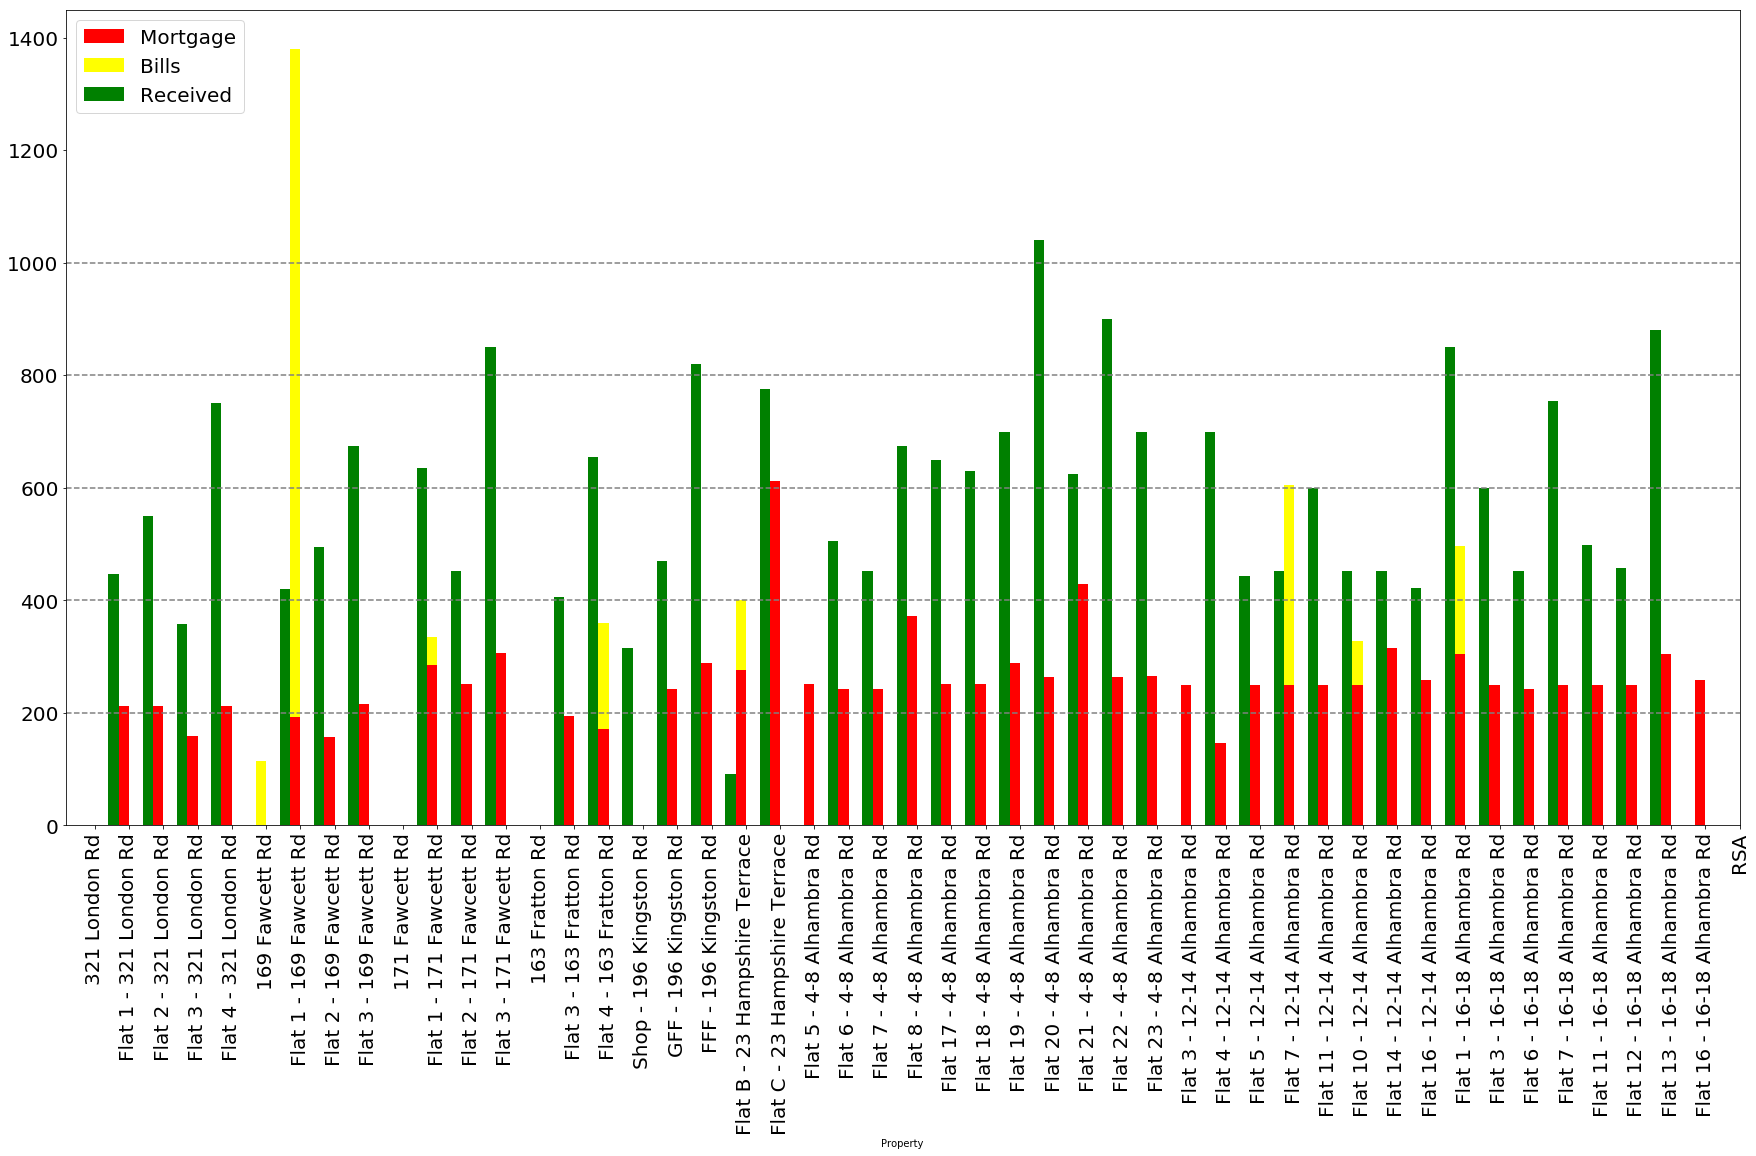

In [22]:
plot_income_expenditure_per_property(dfRs)

### Net Income Per Property

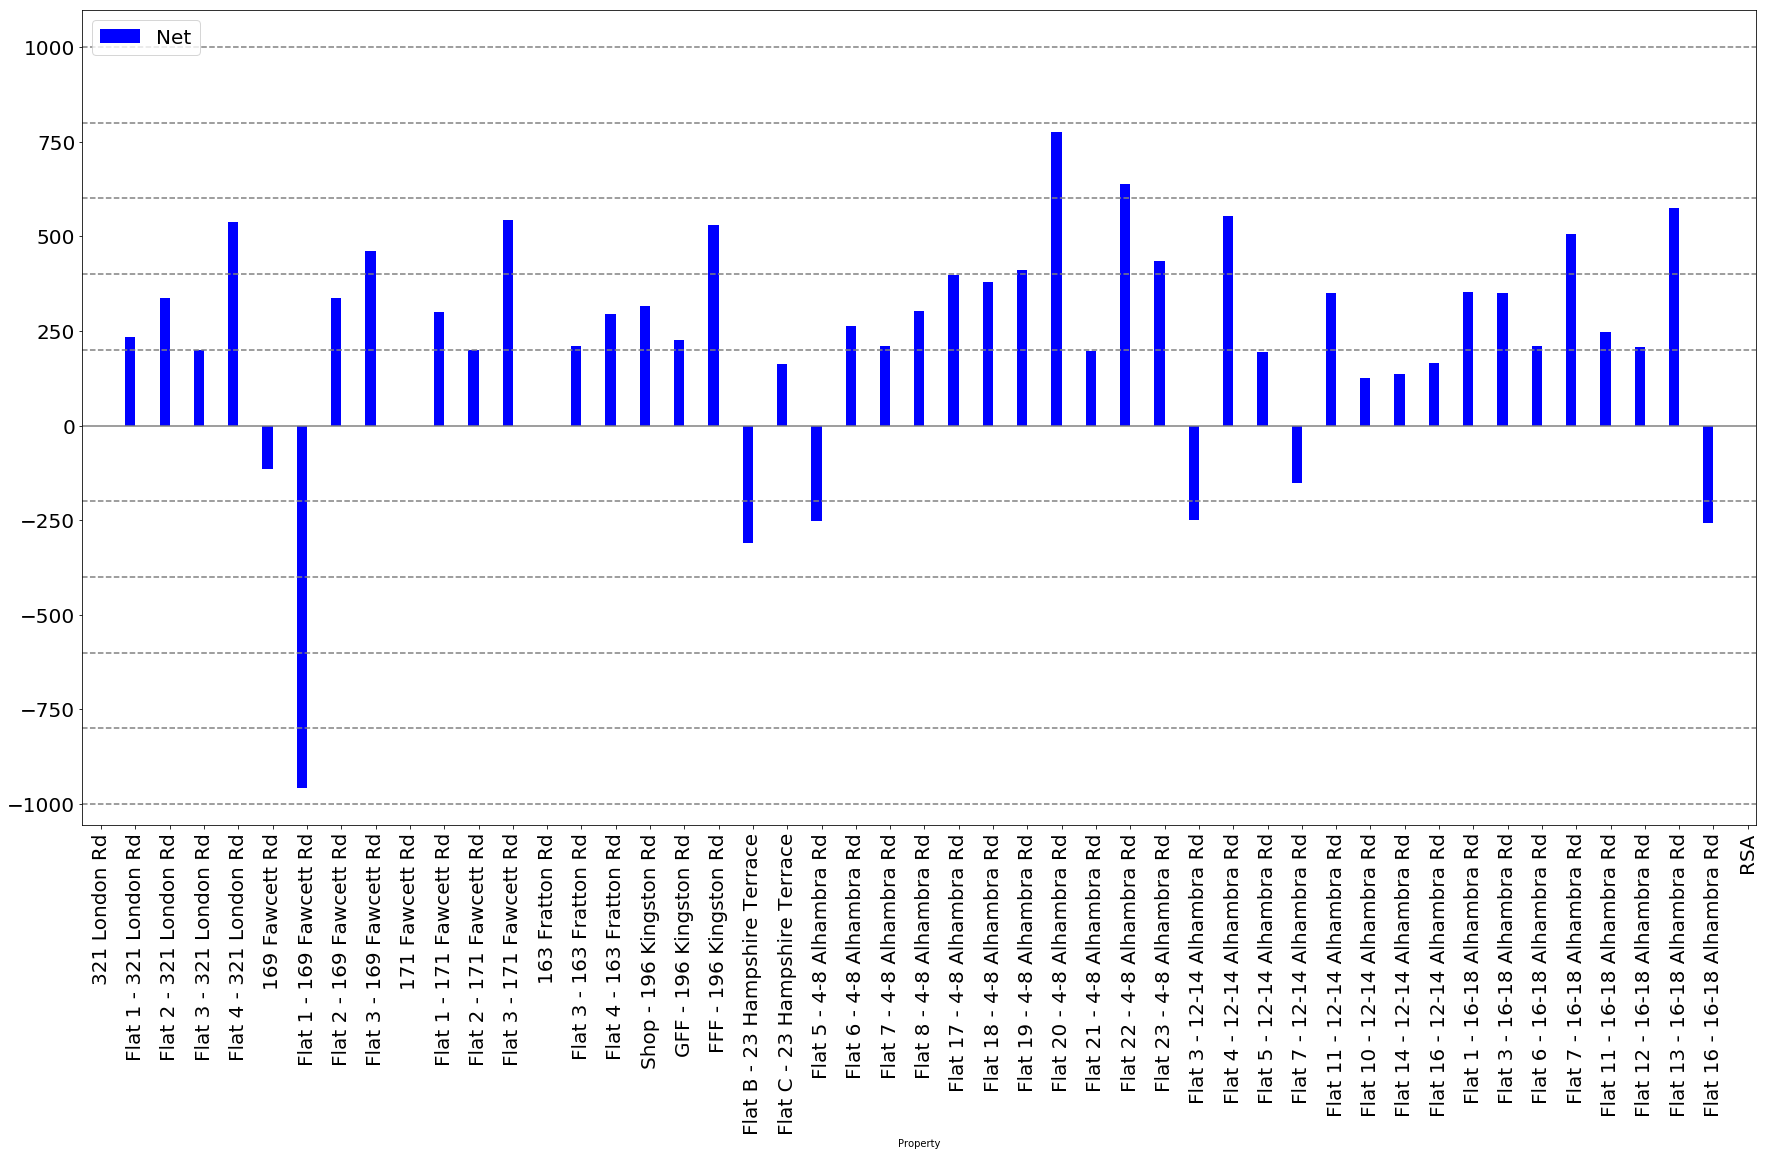

In [23]:
plot_net_income(dfAll)